


### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

The problem statement reads as follows:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.

<a id="cont"></a>

## Table of Contents
<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

- <a href=#two>3.1 Numerical and categorical features</a>

- <a href=#four>3.2 Null Values </a>

- <a href=#four>3.3 Descriptive analysis </a>

- <a href=#four>3.4 Distribution and Skewness </a>

- <a href=#four>3.5 Outliers </a>

- <a href=#four>3.6 Correlation and Multicollinearity </a>

<a href=#four>4. Data Engineering</a>

- <a href=#four>4.1 Updating the categorical features</a>

- <a href=#four>4.2 Missing Values</a>

- <a href=#four>4.3 Scaling and Standardisation </a>

- <a href=#four>4.4 Variable Selection using utual Information Feature Selection </a>

- <a href=#four>4.5 Preparing the test dataset </a>

<a href=#five>5. Modeling</a>


- <a href=#four>5.1 Fitting linear regression models using Sklearn and OLS </a>

- <a href=#four>Fitting a model on the dataset with optimal features </a>

- <a href=#four>5.3 Fitting a regularized linear regression model </a>

- <a href=#four>5.4. Building a Random Forest Regression Model </a>

- <a href=#four>5.5. Fitting a decision tree model </a>

- <a href=#four>5.6. Support Vector Regressor </a>

- <a href=#four>5.7. Heterogeneous Ensembles </a>


<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# Introduction

## Overview

The supply of electricity plays a large role in the livelihood of citizens in a country. Electricity, amongst other things, helps us stay connected, keep warm, and feed our families. Therefore there's a need to keep the lights on in order to maintain and improve the standard of living by investing in electricity infrastructure. However, in recent years, there has been evidence that the use of purely non-renewable sources is not sustainable.

The government of Spain is considering an expansion of its renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the country's renewable sources and fossil fuel energy generation. For this very reason, the government of Spain has been tracking the different energy sources available within the country.

In this project,  the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain is modelled. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc.

## Problem Statement 

The main objective of this project is to construct a machine learning algorithm , capable of accurately predicting the future patterns of the country's renewable sources and fossil fuel energy generation.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

    

In this section the libraries that will be used throughout the analysis and modelling are imported and discussed. 

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns

# Libraries for data preparation and model building
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from scipy import stats
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


 In this section data is loaded  from the `df_train` file into a DataFrame. 



In [3]:
df = pd.read_csv("df_train.csv")
pd.set_option('display.max_columns', None)
df.head(5) 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


    
In this section,  an in-depth analysis of all the variables in the DataFrame is perfomed.

looking at:

-  Numerical and categorical features
-  Features with null values
-  Descriptive analysis 3.4 Distribution and Skewnes
-  Distribution and Skewnes
-  Outliers
-  Correlation and Multicollinearities

###  3.1 Numerical and categorical features

Looking  at the method df.info(). This will provide the information about the data types of the variables, the number of variables and the non-null count for each variable.

In [4]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Above it is observed that there are features that contain non-numerical values. These are __*Time*, *Valencia_wind_deg*__ and __*Seville_pressure*__. A regression model can only work with only numerical data (int or float). These features are converted to have numerical information in the Part 4, data engineering.


###  3.2 Null Values

 looking at the function df.isnull().sum(). This will give us information about which variables have null values.

In [4]:
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Above itis seen  that __*Valencia_pressure*__ has 2068 Null values.These missing values should be filled using the "fillna" fuction in the data engineering section.The *__"Unnamed: 0"__* feature also has to be dropped  because it is redundant (it is not needed)

### 3.3 Descriptive analysis

The table below shows the descriptive statistics of the variables in the data provided.

In [5]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

We obsserve  that __*load_shortfall_3h*__ has negative values the lowest being -6618.

We believe that the Load Short Fall is the difference between the power generation through fossil fuel and renewable energy sources. The negative values of the Load Short Fall could mean that the fossil fuel is doing better than renewable energy in generating electricity and positive values could mean that renewable energy is doing well compared to fossil fuel.


Standard deviation is a measure of average distance from the mean. It is used to measure of how dispersed the data is in relation to the mean. We can use coefficient of variation (CV) to measure how spread out values are in a dataset relative to the mean. The CV is a ratio between the standard deviation and the mean. The higher the CV, the higher the standard deviation relative to the mean. In general, a CV value greater than 1 is often considered high.

In [6]:
CV=abs(df.std(axis = 0))/abs(df.mean(axis = 0))


print(CV)

Unnamed: 0               0.577449
Madrid_wind_speed        0.762810
Bilbao_rain_1h           2.761647
Valencia_wind_speed      0.932303
Seville_humidity         0.361022
Madrid_humidity          0.423853
Bilbao_clouds_all        0.748831
Bilbao_wind_speed        0.916520
Seville_clouds_all       1.769809
Bilbao_wind_deg          0.642035
Barcelona_wind_speed     0.624351
Barcelona_wind_deg       0.467488
Madrid_clouds_all        1.440615
Seville_wind_speed       0.689841
Barcelona_rain_1h        4.923986
Seville_rain_1h          4.459006
Bilbao_snow_3h          17.462507
Barcelona_pressure      10.212992
Seville_rain_3h         15.088844
Madrid_rain_1h           4.036128
Barcelona_rain_3h        9.088357
Valencia_snow_3h        57.766503
Madrid_weather_id        0.099949
Barcelona_weather_id     0.115071
Bilbao_pressure          0.009871
Seville_weather_id       0.092867
Valencia_pressure        0.009393
Seville_temp_max         0.029837
Madrid_pressure          0.021972
Valencia_temp_

<ipython-input-6-219a6e38d00d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CV=abs(df.std(axis = 0))/abs(df.mean(axis = 0))


From the calculation of the CV. We observe that the following variables have high CVs. This means that these variables have a greater level of dispersion around the mean. They are less reliable.

-  Bilbao_rain_1h           
-  Seville_clouds_all       
-  Madrid_clouds_all        
-  Barcelona_rain_1h
-  Seville_rain_1h
-  Bilbao_snow_3h
-  Barcelona_pressure
-  Seville_rain_3h
-  Valencia_snow_3h

The highest CV is from the feature Valencia_snow_3h with a CV of 58. Bilbao_snow_3h has the second highest CV with 17.

### 3.4 Distribution and Skewness

Skewed data means that there is a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution. If our data is too skewed, then our model may not work because the tail region may act as outlier of the statistical model. It will be necessary to transform the skewed data to a close enough normal distribution for our model to work.


If the skewness is between -0.5 and 0.5, the data is fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data is moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.


In [7]:
#skewness
df.skew()

<ipython-input-7-ca90bfe58b72>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

The following variables have skewness values that are great and less than 1. The distributions of the following these variables are highly skewed.

- Madrid_wind_speed      
- Bilbao_rain_1h           
- Valencia_wind_speed      
- Bilbao_wind_speed        
- Seville_clouds_all       
- Barcelona_wind_speed     
- Madrid_clouds_all        
- Seville_wind_speed       
- Barcelona_rain_1h        
- Seville_rain_1h          
- Bilbao_snow_3h          
- Barcelona_pressure      
- Seville_rain_3h         
- Madrid_rain_1h           
- Barcelona_rain_3h       
- Valencia_snow_3h        
- Madrid_weather_id       
- Barcelona_weather_id    
- Seville_weather_id      
- Valencia_pressure       
- Madrid_pressure         
- Bilbao_weather_id   

Data from a normal distribution tends to have a skewness of zero,implying that the above data does not follow a normal distribution

*__Histogram plots__*


The distributions of the variables can also be observed by looking at their respective histograms and barplots. The skewness of the variables can be detected with these plots.

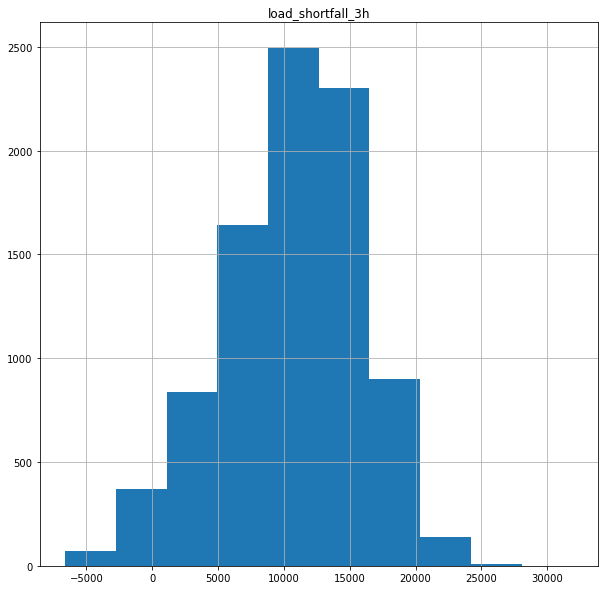

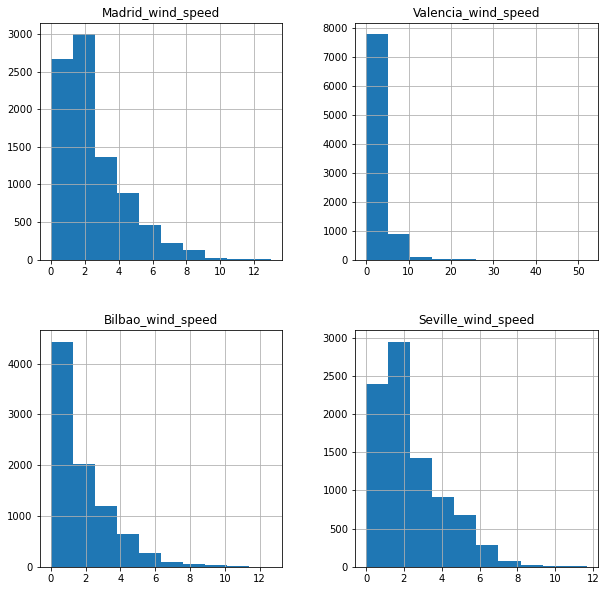

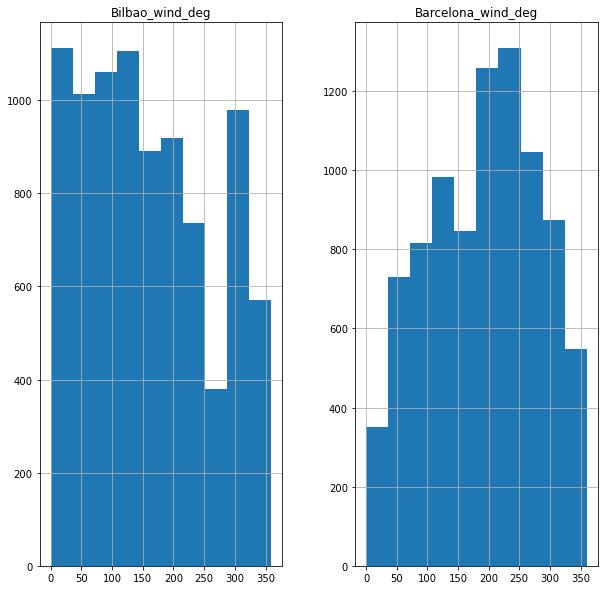

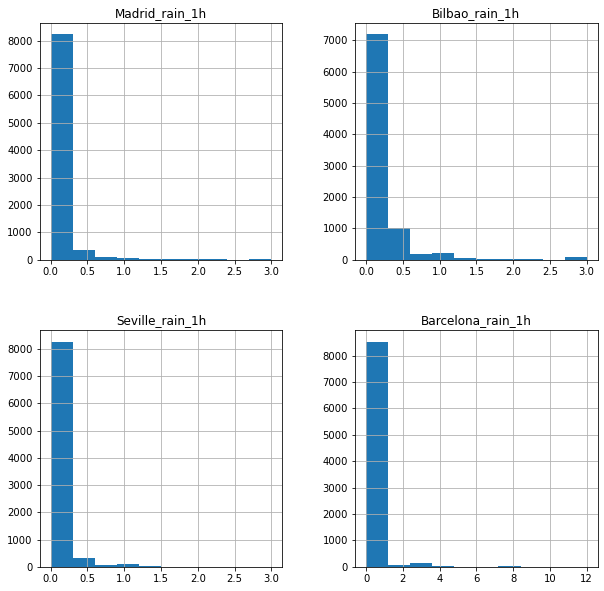

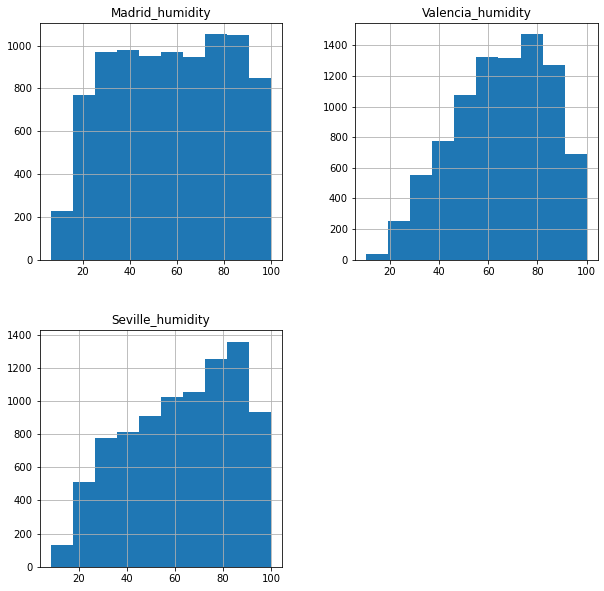

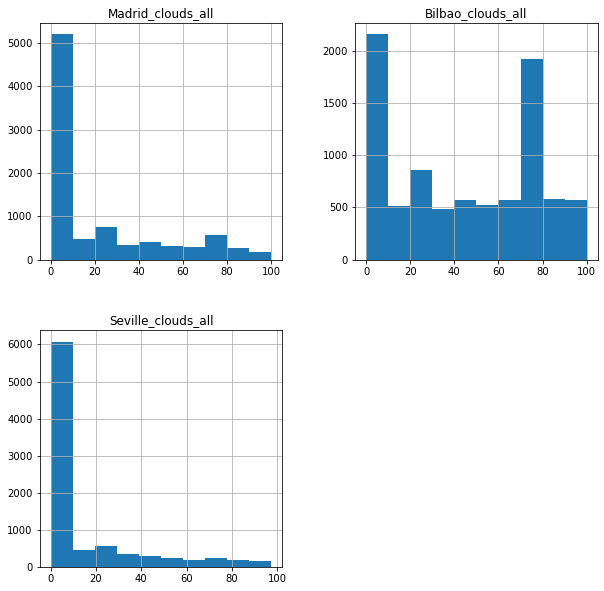

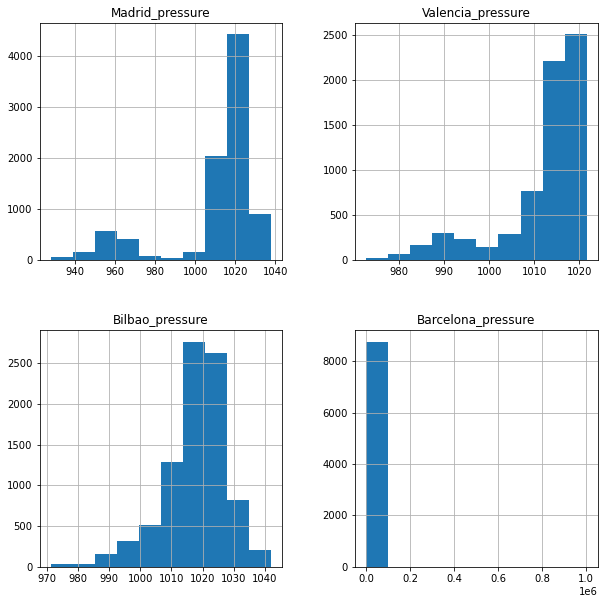

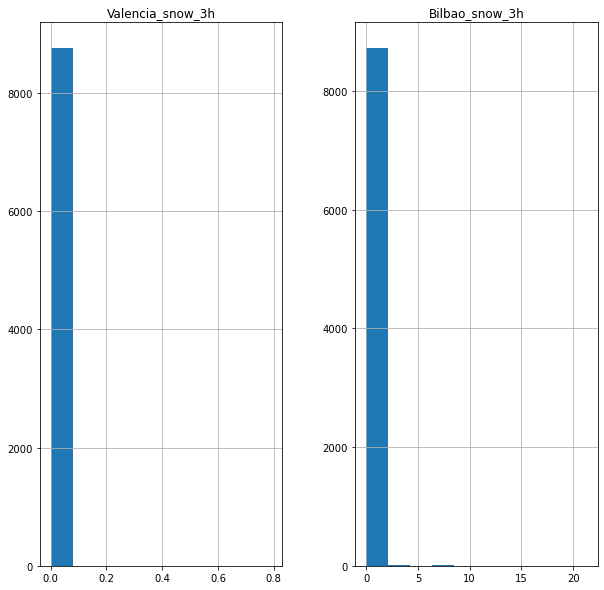

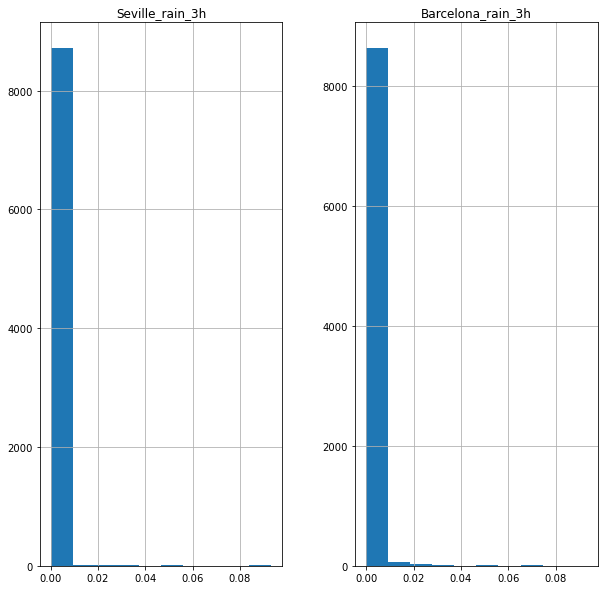

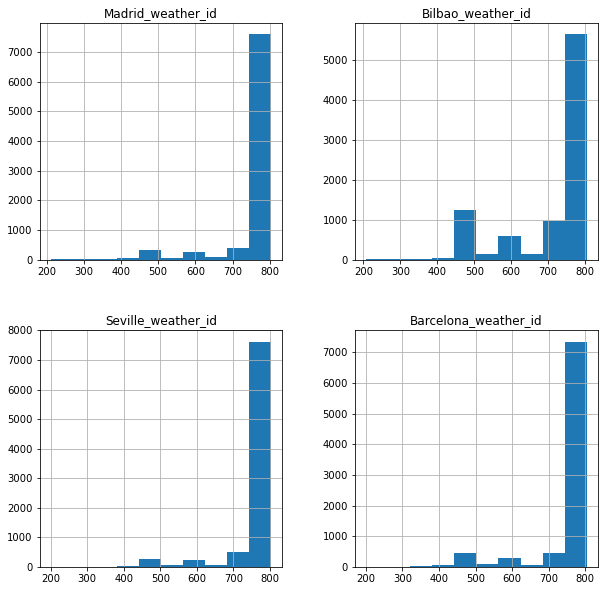

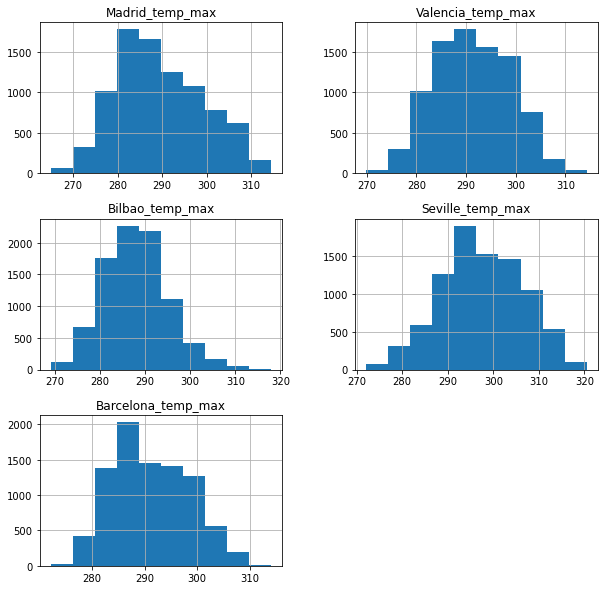

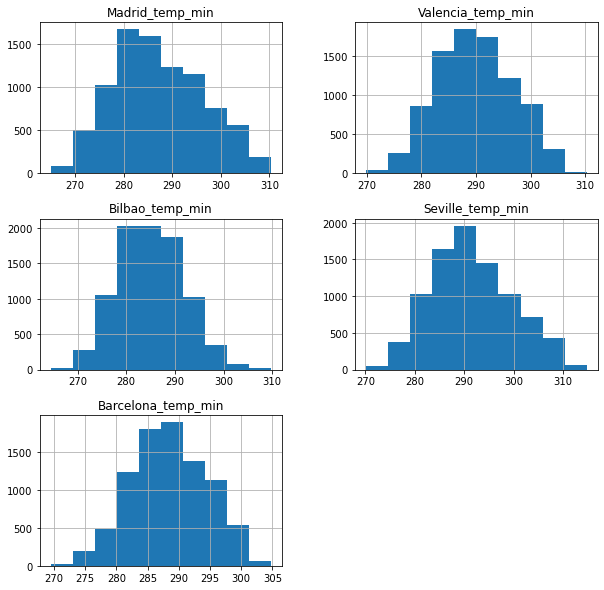

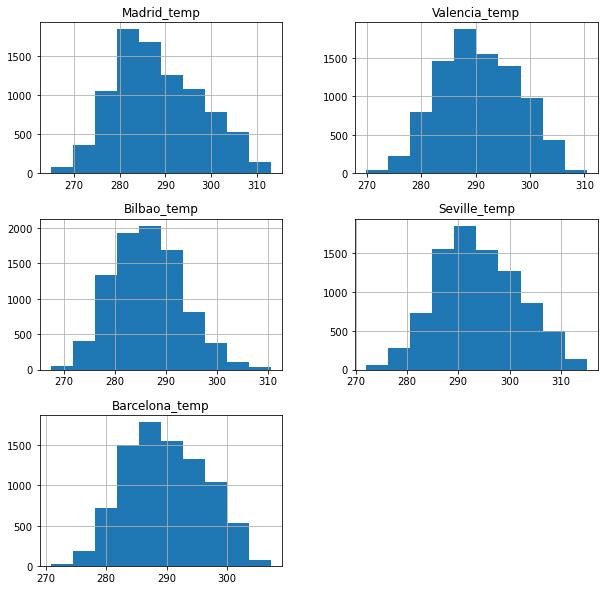

In [8]:
#histograms for Numerical data

#dependent variable
features_load_shortfall_3h = ['load_shortfall_3h']  # create a histogram for the y variable 
df[features_load_shortfall_3h].hist(figsize=(10,10), bins=10);

# wind speed
features_wind_speed = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);
    
                             
# wind degrees
features_wind_speed = ['Bilbao_wind_deg', 'Barcelona_wind_deg'] # create a list of all numerical features(wind_speed)
df[features_wind_speed].hist(figsize=(10,10), bins=10);                             
                      
                             
#rain_1hr
features_rain_1h = ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] # create a list of all numerical features (rain_1h)
df[features_rain_1h].hist(figsize=(10,10), bins=10);   
                             
                          
#humidity
features_humidity = ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] # create a list of all numerical features (humidity)
df[features_humidity].hist(figsize=(10,10));
                                                         

#clouds
features_clouds_all = ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#pressure
features_clouds_all = ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#snow_3h
features_clouds_all = ['Valencia_snow_3h', 'Bilbao_snow_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));

#rain_3h
features_clouds_all = ['Seville_rain_3h', 'Barcelona_rain_3h'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));
                             
                             
#weather_id
features_clouds_all = ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id'] # create a list of all numerical features(clouds_all)
df[features_clouds_all].hist(figsize=(10,10));                             
                           
#temp_max                             
features_temp_max = ['Madrid_temp_max', 'Valencia_temp_max', 'Bilbao_temp_max', 'Seville_temp_max', 'Barcelona_temp_max'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);

#temp_max                             
features_temp_max = ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);                          
                     
#temp                            
features_temp_max = ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp'] # create a list of all numerical features (temp_max)
df[features_temp_max].hist(figsize=(10,10), bins=10);
                             

We can observe from the graphs above that the following variables have  0.0 values (skewed to the left)
- Barcelona_pressure
- Valencia_snow_3h
- Bilbao_snow_3h
- Seville_rain_3h

The following variables have alot of 0.0 value (skewed to the left)
- Seville_rain_1h','Barcelona_rain_1h
- Seville_rain_1h','Barcelona_rain_1h

<AxesSubplot:xlabel='Seville_pressure', ylabel='count'>

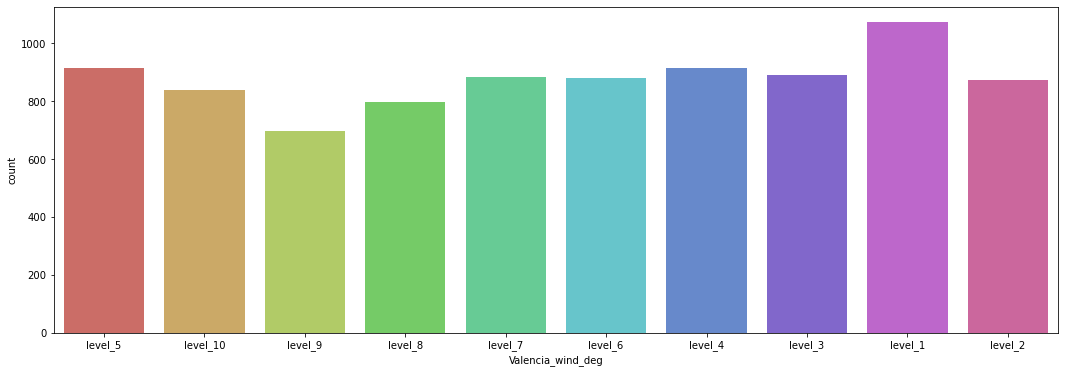

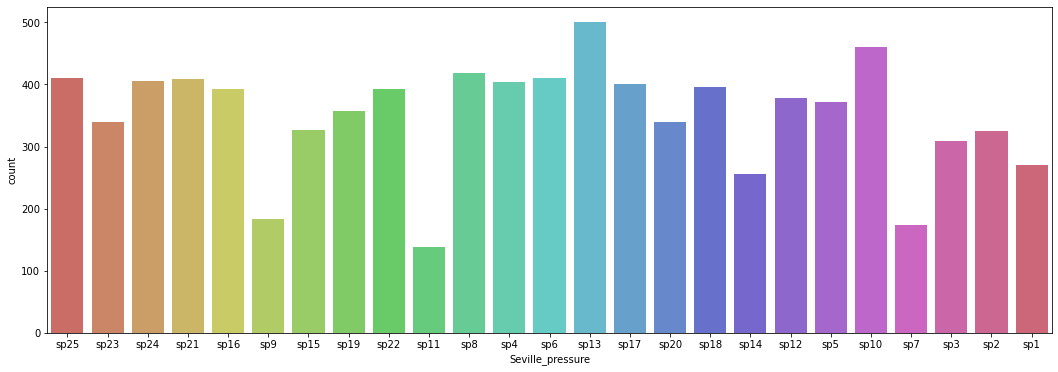

In [9]:
#categorical bar plots

#wind_deg
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")

#Seville_pressure
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Seville_pressure', data = df, palette="hls")

### 3.5 Outliers

Kurtosis measures the peakness or flatness of a distribution.If the kurtosis value for a distribution is greater than 3,then the distribution is peaked or leptokurtic.Kurtosis value below  3 means the feature distribution is flat.

In [10]:
#kurtosis
df.kurtosis()

<ipython-input-10-c1a853d8d8fd>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

From the analysis above while most of the features have a flat distribution, it is observed that the following variables have a kurtosis value larger than 3 thus there is evidence of outliers in some features in the dataframe,which have to be eliminated in the features engineering part.

- Bilbao_rain_1h            
- Valencia_wind_speed       
- Bilbao_wind_speed          
- Barcelona_rain_1h        
- Seville_rain_1h           
- Bilbao_snow_3h           
- Barcelona_pressure      
- Seville_rain_3h          
- Madrid_rain_1h            
- Barcelona_rain_3h        
- Valencia_snow_3h        
- Madrid_weather_id          
- Barcelona_weather_id       
- Seville_weather_id        
- Valencia_pressure          

*__Boxplots__*

 The boxplot and scatter plot can also be used to graphically see if there is outliers in the data.If there is an outlier it  will plotted as point in boxplot but other population will be grouped together and display as boxes.

The black dots in the graphs below represent the outliers for each of the variables.

<AxesSubplot:>

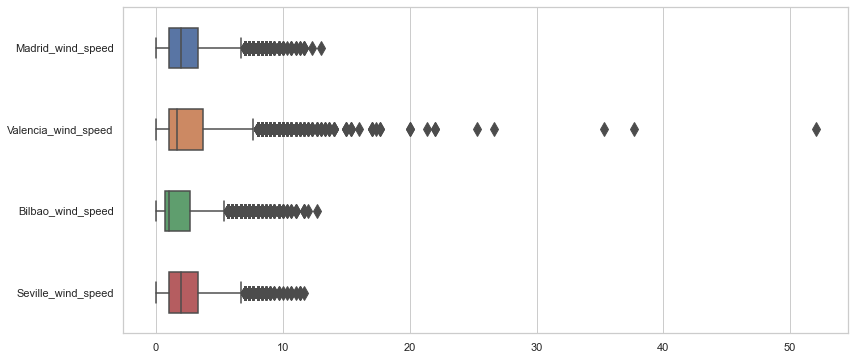

In [11]:
#wind speed
selected_columns = df[ [ 'Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed' ] ]
df_wind_speed = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_speed,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

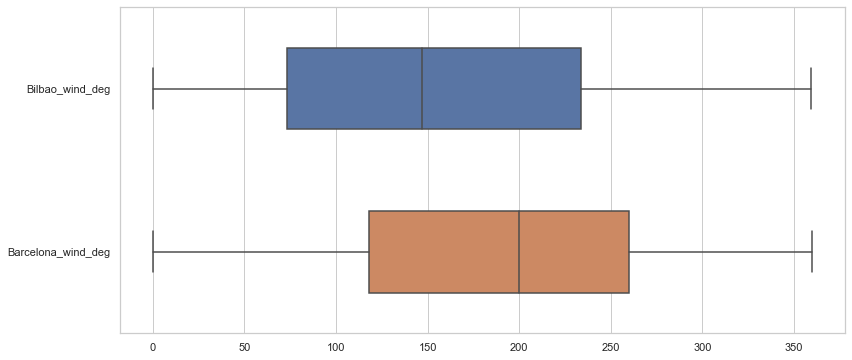

In [12]:
#wind speed
selected_columns = df[ [ 'Bilbao_wind_deg', 'Barcelona_wind_deg'] ]
df_wind_deg = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_wind_deg,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

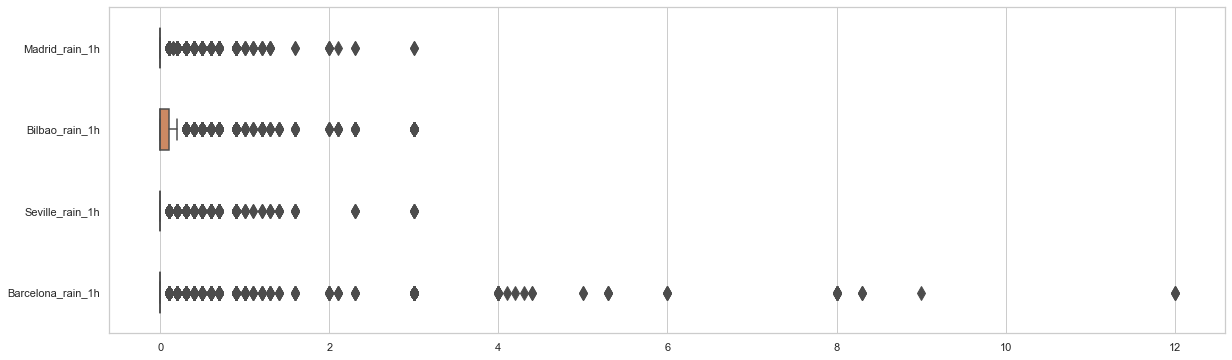

In [13]:
#rain_1h
selected_columns = df[ ['Madrid_rain_1h', 'Bilbao_rain_1h','Seville_rain_1h','Barcelona_rain_1h'] ]
df_rain_1h = selected_columns.copy() 



sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(20,6))
sns.boxplot(data=df_rain_1h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

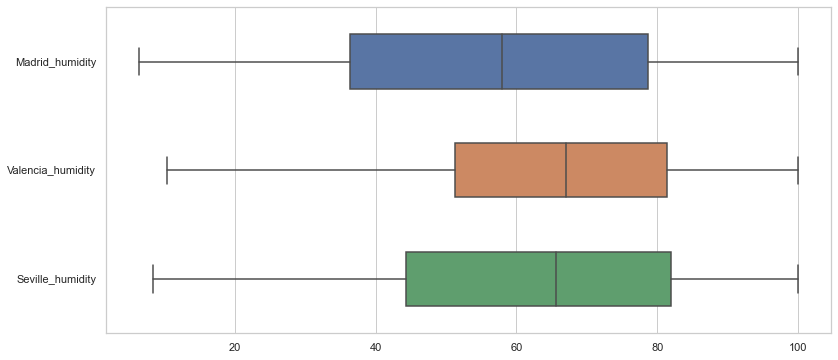

In [14]:
#humidity
selected_columns = df[ ['Madrid_humidity', 'Valencia_humidity', 'Seville_humidity'] ]
df_humidity = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_humidity,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

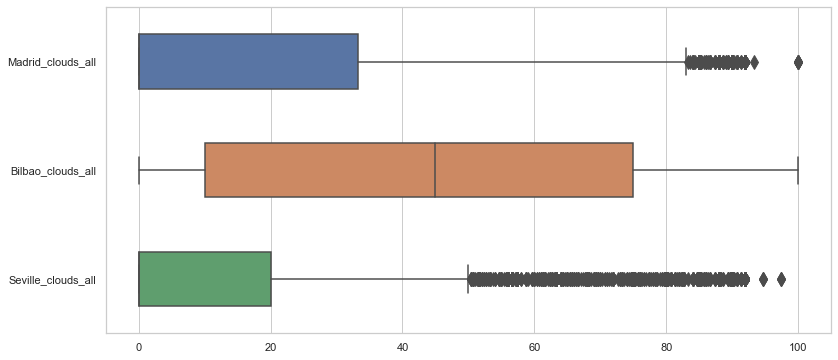

In [15]:
#clouds_all
selected_columns = df[ ['Madrid_clouds_all', 'Bilbao_clouds_all', 'Seville_clouds_all'] ]
df_clouds_all = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_clouds_all,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

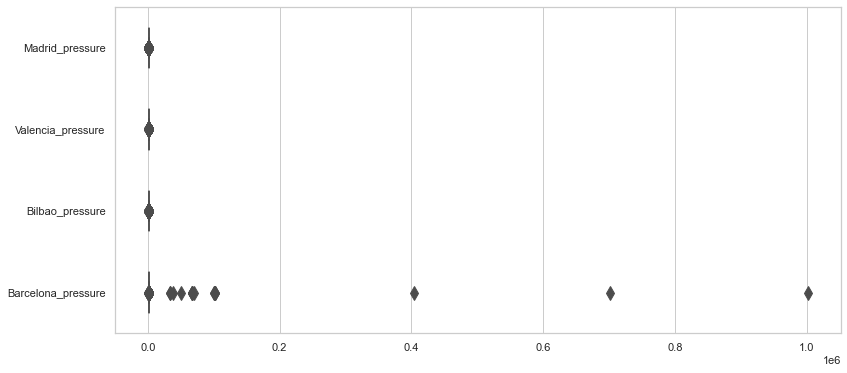

In [16]:
#pressure
selected_columns = df[ ['Madrid_pressure', 'Valencia_pressure', 'Bilbao_pressure', 'Seville_pressure', 'Barcelona_pressure'] ]
df_pressure = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_pressure,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

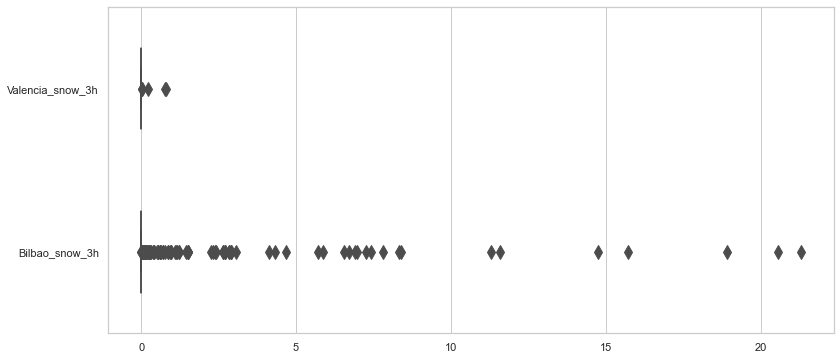

In [17]:
#snow_3h
selected_columns = df[ ['Valencia_snow_3h', 'Bilbao_snow_3h'] ]
df_snow_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_snow_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

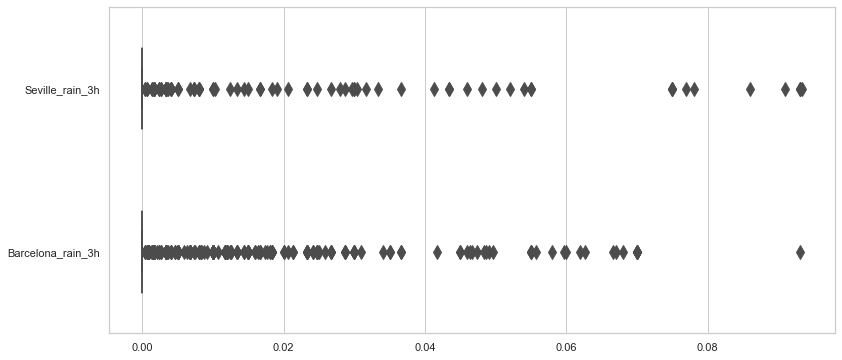

In [18]:
#rain_3h
selected_columns = df[ ['Seville_rain_3h', 'Barcelona_rain_3h' ]]
df_rain_3h = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_rain_3h,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

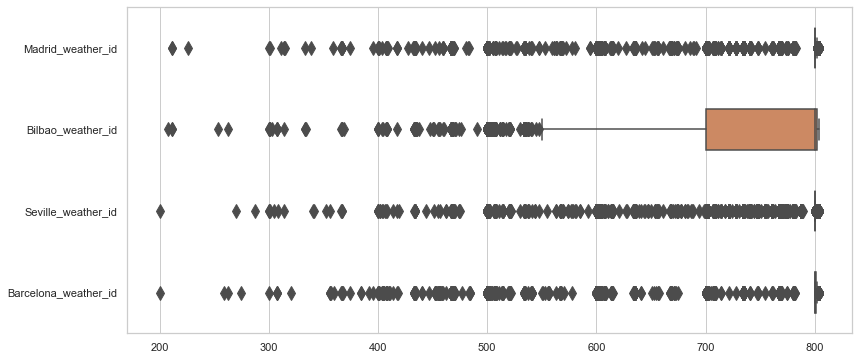

In [19]:
#weather_id
selected_columns = df[ ['Madrid_weather_id', 'Bilbao_weather_id', 'Seville_weather_id', 'Barcelona_weather_id' ]]
df_weather_id = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_weather_id,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

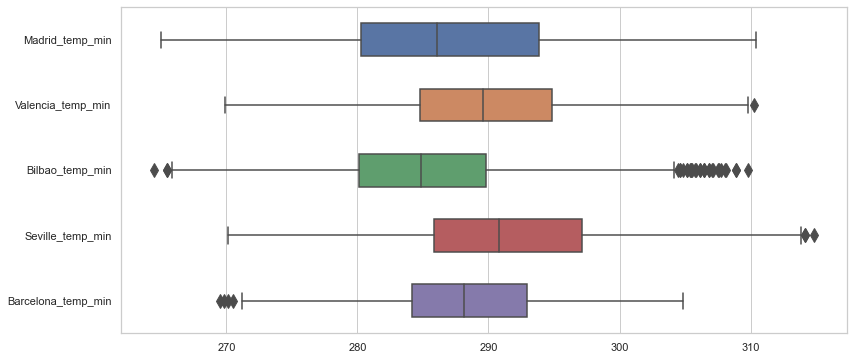

In [20]:
#temp_min
selected_columns = df[ ['Madrid_temp_min', 'Valencia_temp_min', 'Bilbao_temp_min', 'Seville_temp_min', 'Barcelona_temp_min']]
df_temp_min = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp_min,orient="h",width=0.5, fliersize=10)

<AxesSubplot:>

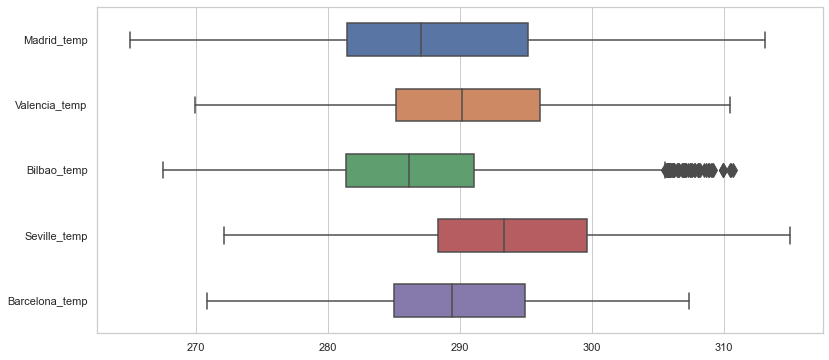

In [21]:
#temp
selected_columns = df[ ['Madrid_temp', 'Valencia_temp', 'Bilbao_temp', 'Seville_temp', 'Barcelona_temp']]
df_temp = selected_columns.copy() 

sns.set(style="whitegrid")
fig, ax=plt.subplots(figsize=(13,6))
sns.boxplot(data=df_temp,orient="h",width=0.5, fliersize=10)

This data should therefore be standardised in the data engineering section ,while this will not eliminate outliers it will consider them in a more conservative manner.

### 3.6 Correlation and Multicollinearity

It would be expected for individual feature to have a strong correlation with the response variable. These will show that the feature and the response variable have a relationship.

Below the relevant feature interactions are plotted.

C:\Users\u1121\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:xlabel='Barcelona_temp', ylabel='load_shortfall_3h'>

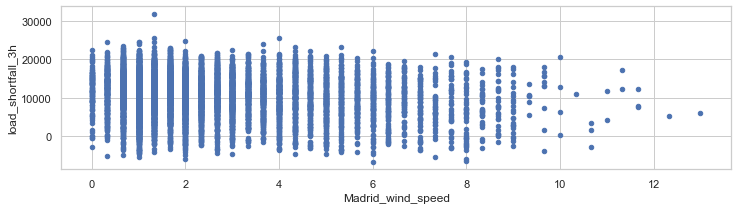

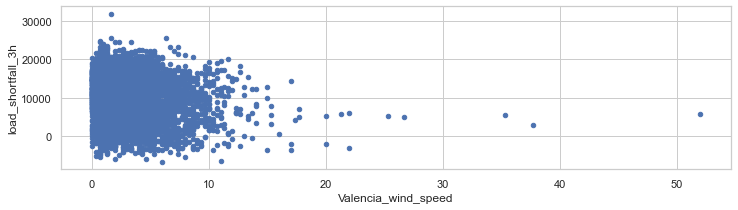

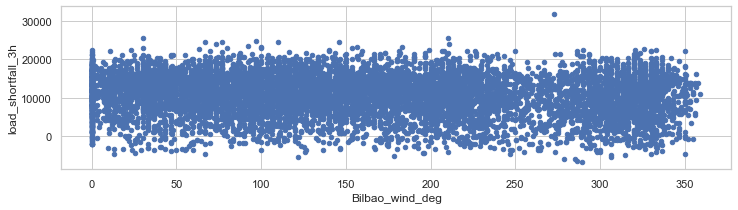

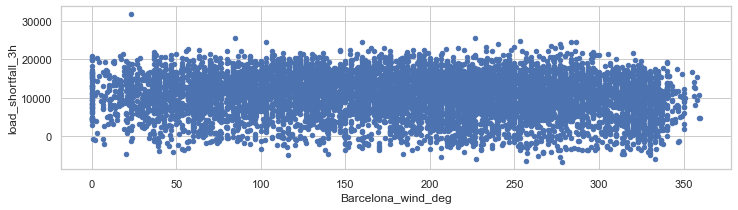

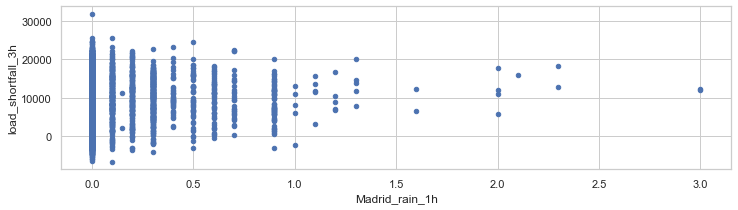

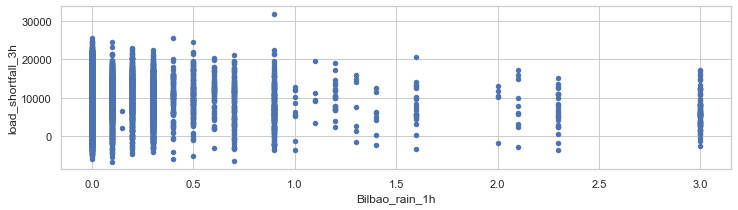

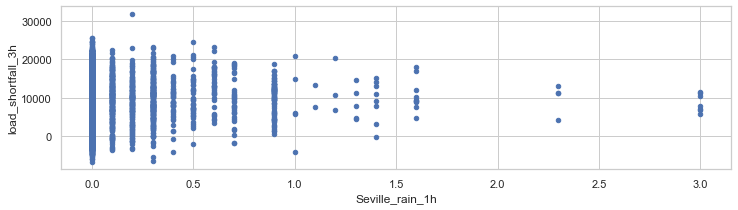

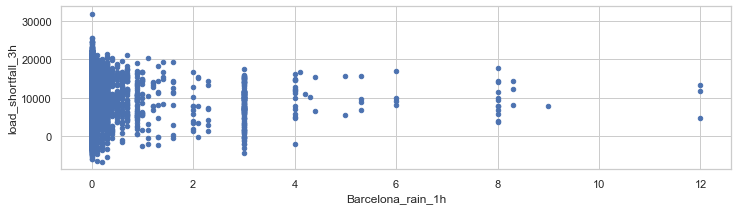

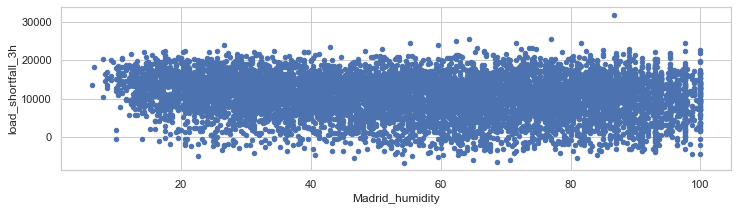

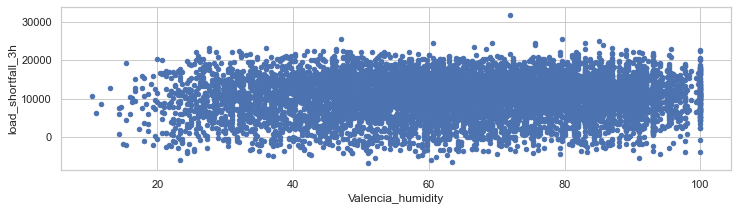

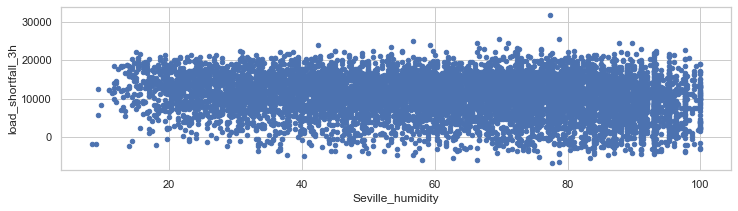

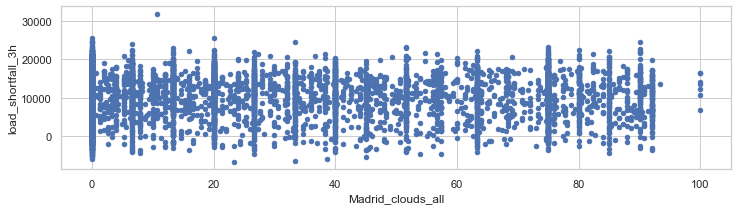

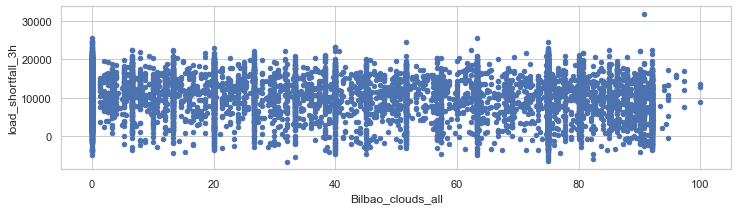

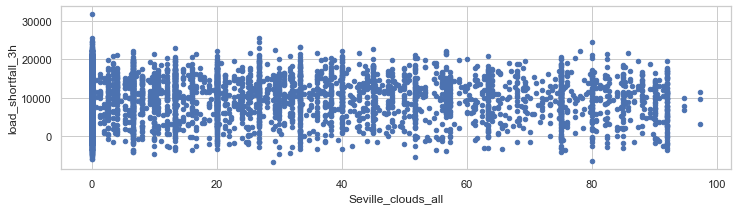

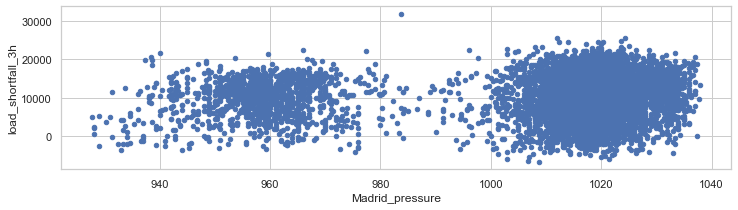

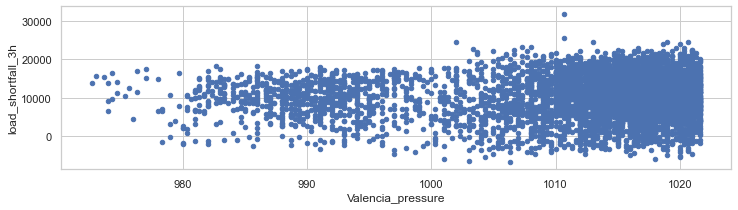

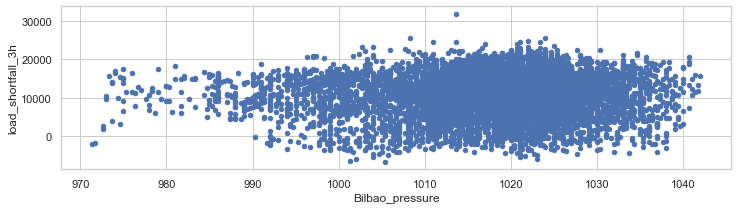

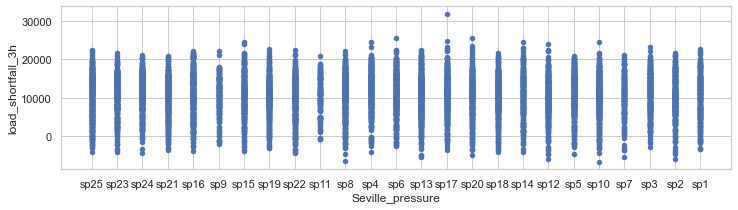

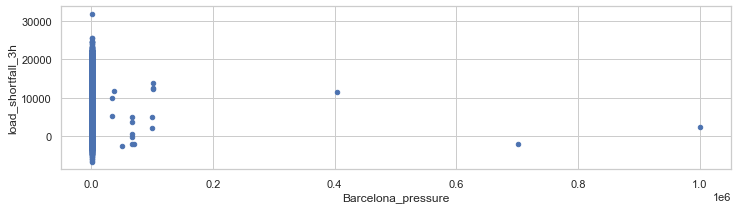

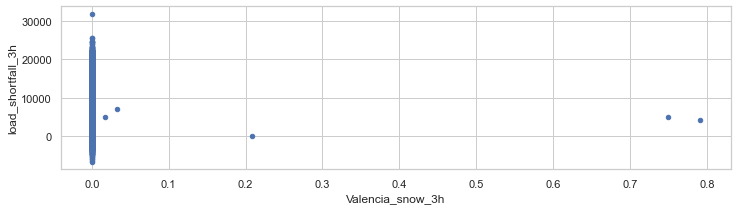

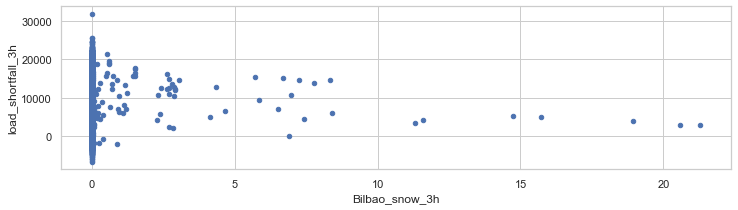

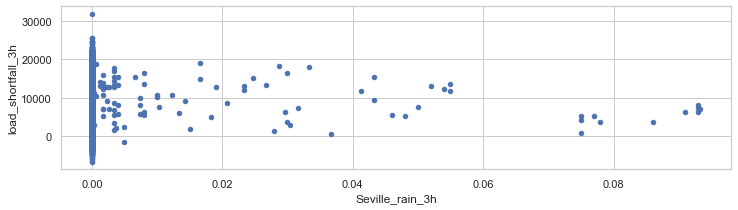

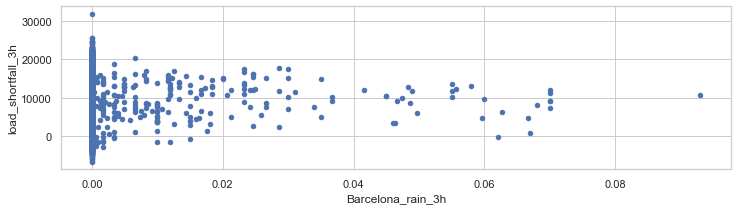

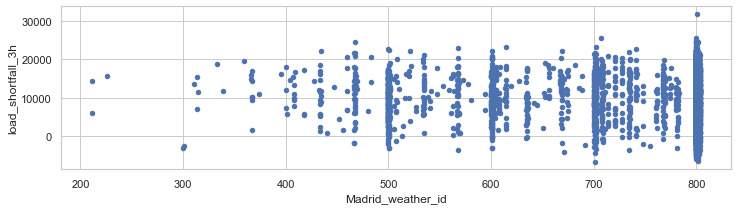

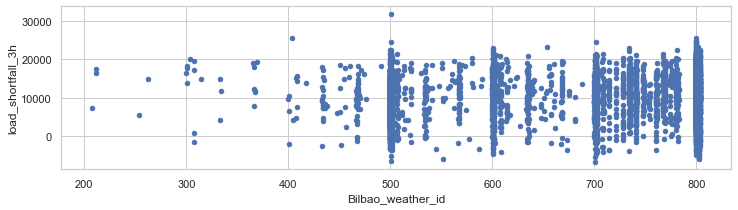

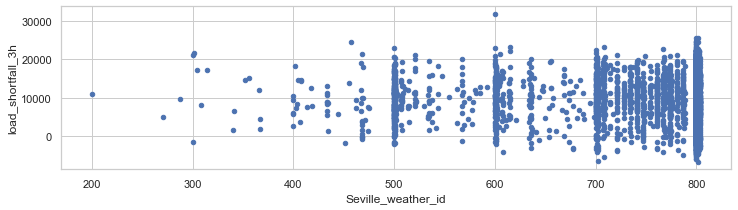

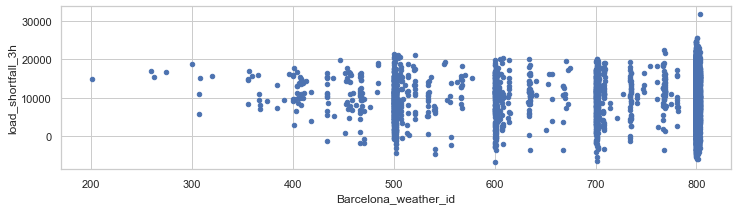

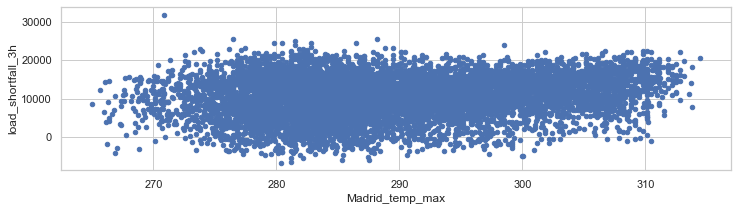

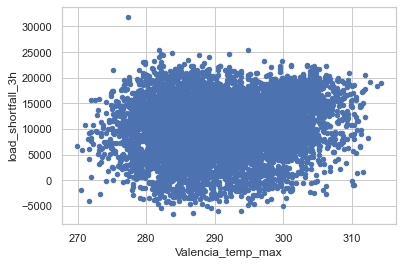

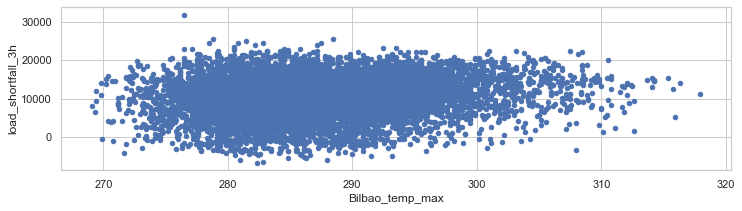

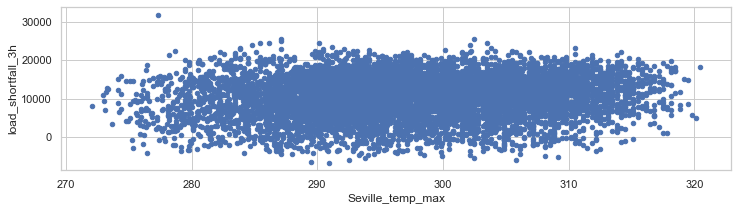

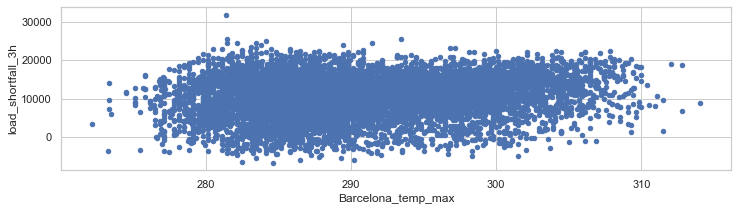

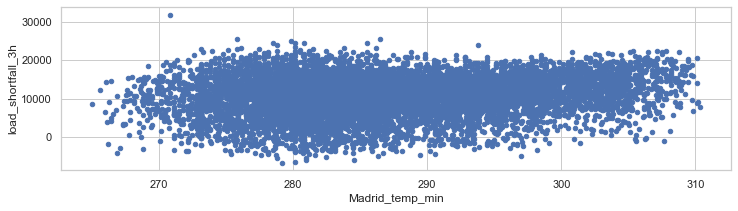

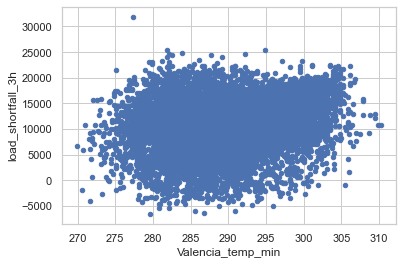

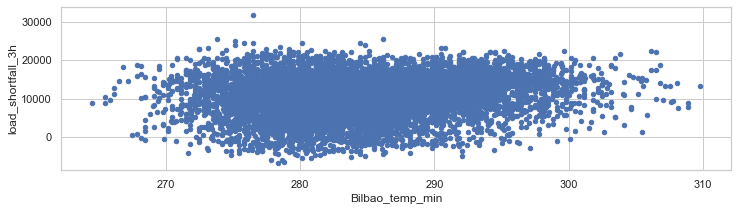

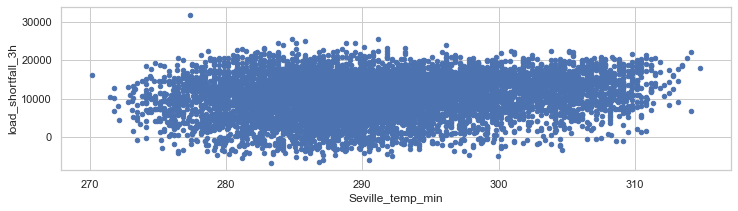

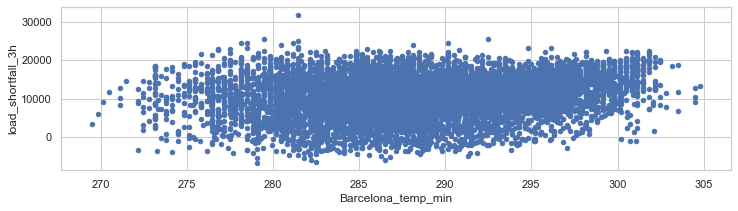

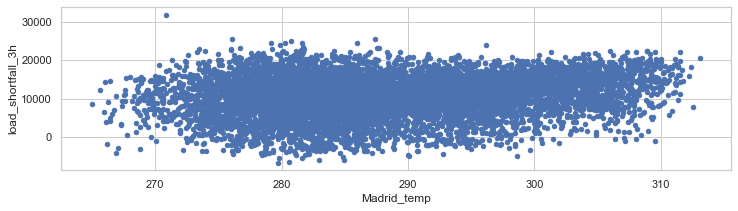

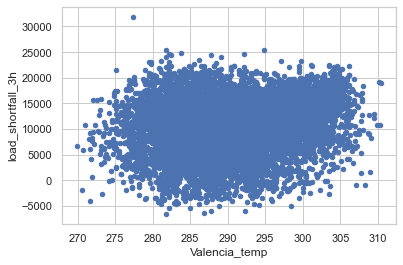

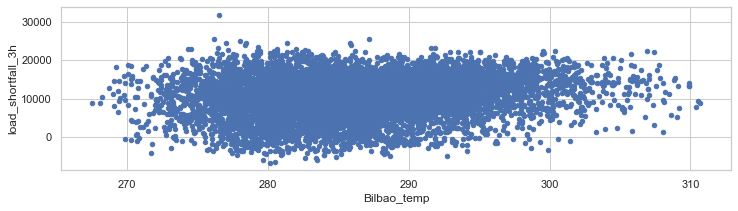

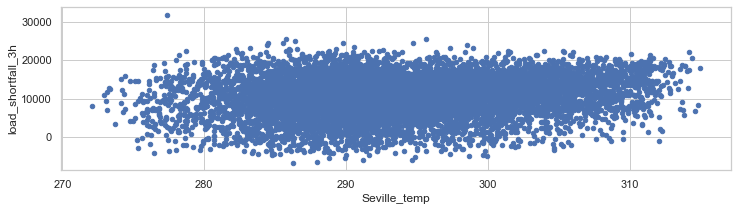

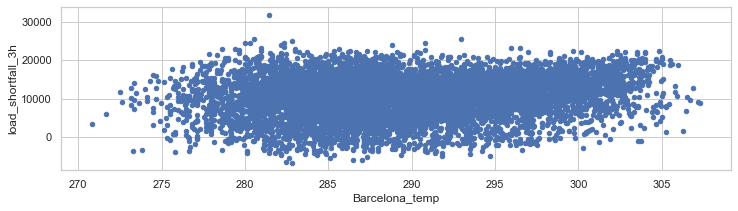

In [22]:

# wind speed
df.plot.scatter(x='Madrid_wind_speed',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_wind_speed',y='load_shortfall_3h', figsize=(12, 3))

# wind degrees
df.plot.scatter(x='Bilbao_wind_deg',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_wind_deg',y='load_shortfall_3h', figsize=(12, 3))

#rain
df.plot.scatter(x='Madrid_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_rain_1h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_1h',y='load_shortfall_3h', figsize=(12, 3))

#humidity

df.plot.scatter(x='Madrid_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_humidity',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_humidity',y='load_shortfall_3h', figsize=(12, 3))

#clouds
df.plot.scatter(x='Madrid_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_clouds_all',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_clouds_all',y='load_shortfall_3h', figsize=(12, 3))


#pressure
df.plot.scatter(x='Madrid_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_pressure',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_pressure',y='load_shortfall_3h', figsize=(12, 3))

#snow_3h
df.plot.scatter(x='Valencia_snow_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_snow_3h',y='load_shortfall_3h', figsize=(12, 3))

#rain_3h
df.plot.scatter(x='Seville_rain_3h',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_rain_3h',y='load_shortfall_3h', figsize=(12, 3))

#weather_id
df.plot.scatter(x='Madrid_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Bilbao_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_weather_id',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_weather_id',y='load_shortfall_3h', figsize=(12, 3))

#temp_max
df.plot.scatter(x='Madrid_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_max',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_max',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_max',y='load_shortfall_3h', figsize=(12, 3))

#temp_min
df.plot.scatter(x='Madrid_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp_min',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp_min',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp_min',y='load_shortfall_3h', figsize=(12, 3))

#temp
df.plot.scatter(x='Madrid_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Valencia_temp',y='load_shortfall_3h')
df.plot.scatter(x='Bilbao_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Seville_temp',y='load_shortfall_3h', figsize=(12, 3))
df.plot.scatter(x='Barcelona_temp',y='load_shortfall_3h', figsize=(12, 3))

 Clear negative or positive correlation with regards to the features and load shortfall is observed.

In [23]:
# evaluate correlation
df.corr()


,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.37785

The following features are positively correclated with load_shortfall_3h
 - Madrid_wind_speed
 - Bilbao_rain_1h
 - Valencia_wind_speed
 - Seville_humidity
 - Madrid_humidity
 - Madrid_humidity
 - Bilbao_clouds_all
 - Bilbao_wind_speed
 - Seville_clouds_all
 - Bilbao_wind_deg
 - Barcelona_wind_speed
 - Barcelona_wind_deg
 - Madrid_clouds_all
 - Seville_wind_speed
 - Barcelona_rain_1h
 - Bilbao_snow_3h
 - Barcelona_pressure
 - Seville_rain_3h
 - Madrid_rain_1h
 - Barcelona_rain_3h
 - Valencia_snow_3h


The following features are negatively correclated with load_shortfall_3h

 
- Madrid_weather_id
- Barcelona_weather_id
- Bilbao_pressure
- Seville_weather_id
- Valencia_pressure
- Seville_temp_max
- Madrid_pressure
- Valencia_temp_max
- Valencia_temp
- Bilbao_weather_id
- Seville_temp
- Valencia_humidity
- Barcelona_temp_max
- Madrid_temp_max
- Barcelona_temp
- Bilbao_temp_min
- Bilbao_temp
- Barcelona_temp_min
- Bilbao_temp_max
- Seville_temp_min
- Madrid_temp
- Madrid_temp_min

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Data engineering is the complex task of making raw data usable to data scientists and groups within an organization. Data engineering encompasses numerous specialties of data science .It is one of the indispensable steps in any Machine Learning development life cycle. 

In this section we will clean the dataset and engineer the features, as identified in the EDA phase. 

We will look at:

- Updating the categorical features (time,Valencia_wind_deg and Seville_pressure)
- Removing missing values
- Scaling and Standardisation
- Variable selection using correlation
- Preparing the test dataset

### 4.1 Updating the categorical features

*__Time__*

The DateTime function is used to extract the features of the time data.This is especially helpful in feature engineering because the value of the target variable can be dependent on these various features.

In [5]:
#changing the time column from 'object' dtype to 'date'

df['time'] = pd.to_datetime(df['time'])

df["time"].info()

AttributeError: 'Series' object has no attribute 'info'

In order to model time we need to convert it to integers.

In [25]:
# day
df['Day'] = df['time'].dt.day
# month
df['Month'] = df['time'].dt.month
# year
df['Year'] = df['time'].dt.year
# hour
df['Start_hour'] = df['time'].dt.hour
# minute
df['Start_minute'] = df['time'].dt.minute
# second
df['Start_second'] = df['time'].dt.second
# Monday is 0 and Sunday is 6
df['Start_weekday'] = df['time'].dt.weekday
# week of the year
df['Start_week_of_year'] = df['time'].dt.week
# duration
#df['Duration'] = dfer['End_date']-dfer['Start_date']

<ipython-input-25-a24f0b9505f0>:16: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Start_week_of_year'] = df['time'].dt.week


In [6]:
df.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


Machine learning models cannot interpret the categorical data. Hence, needs the translation to numerical format.

*__Valencia_wind_deg__*

In [7]:
df['Valencia_wind_deg']=df['Valencia_wind_deg'].str.extract('(\d+)')
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])
df['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg, Length: 8763, dtype: int64

*__Seville_pressure__*

In [8]:
df['Seville_pressure']=df['Seville_pressure'].str.extract('(\d+)')
df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])
df['Seville_pressure'] 

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure, Length: 8763, dtype: int64

### 4.2 Missing Values


Here the __Valencia_pressure__ missing values are replaced  with the mean and then the columns, __Valencia_snow_3h__, __Bilbao_snow_3h__, __Seville_rain_3h__, and __Barcelona_rain_3h__  are removed because they have only zero values.

In [9]:
# remove missing values/ features

#Filling missing value with the mean
df_clean = df.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_clean.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_clean.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)

df_clean.head(2)


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,1036.333333,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,1037.333333,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


There are now no variables with missing data

In [10]:
df_clean.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Barcelona_pressure      0
Madrid_rain_1h          0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_temp          0
Bilbao_temp_min         0
Bilbao_temp             0
Barcelona_te

### 4.3 Scaling and Standardisation

Z-score standardisation handles outliers gracefully. Z-score standardisation is implemented by applying the following operation to each of our values

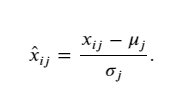

where μj represents the mean of variable xj and σj is the variable's standard deviation

Standardisation divides by a  distribution-aware measure, the standard deviation. While this doesn't completely remove the effects of outliers, it does consider them in a more conservative manner. 


In [11]:
# split predictors and response and time
X = df_clean.drop(['load_shortfall_3h','time'], axis=1)
y = df_clean['load_shortfall_3h']

X.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,1036.333333,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,1037.333333,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667


In [12]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [13]:
# Create scaler object
scaler = StandardScaler()

In [14]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [15]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)


X_standardise.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.42038,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-0.928934,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.37437,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154


In [17]:
#combine presictors and response variable into one data frame
df2 = pd.concat([X_standardise, y], axis = 1)
df2.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.42038,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,6715.666667
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-0.928934,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.37437,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,4171.666667


### 4.4 Variable Selection using utual Information Feature Selection


__Feature selection using mutual information statistics__

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
We can perform feature selection using mutual information on the dataset and print the scores .A bar chart of the feature importance scores for each input feature is also created

In [18]:
#split x and y
X = df2.drop(['load_shortfall_3h'], axis=1)
y = df2['load_shortfall_3h']

In [19]:
#Import libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs



Feature 0: 0.018501
Feature 1: 0.023521
Feature 2: 0.019892
Feature 3: 0.019080
Feature 4: 0.024232
Feature 5: 0.026822
Feature 6: 0.023993
Feature 7: 0.018198
Feature 8: 0.005892
Feature 9: 0.018632
Feature 10: 0.002676
Feature 11: 0.010258
Feature 12: 0.007389
Feature 13: 0.004116
Feature 14: 0.007563
Feature 15: 0.009441
Feature 16: 0.000000
Feature 17: 0.008470
Feature 18: 0.000000
Feature 19: 0.008345
Feature 20: 0.020308
Feature 21: 0.015462
Feature 22: 0.014363
Feature 23: 0.009511
Feature 24: 0.021559
Feature 25: 0.016020
Feature 26: 0.037007
Feature 27: 0.025211
Feature 28: 0.022094
Feature 29: 0.050826
Feature 30: 0.016726
Feature 31: 0.030744
Feature 32: 0.030567
Feature 33: 0.034174
Feature 34: 0.043356
Feature 35: 0.023426
Feature 36: 0.047502
Feature 37: 0.049763
Feature 38: 0.037383
Feature 39: 0.034836
Feature 40: 0.046809
Feature 41: 0.049265


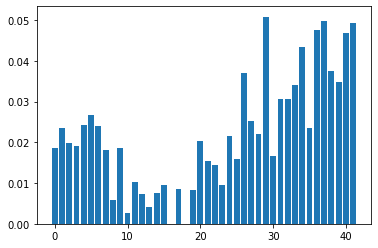

In [20]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)

pyplot.show()

*__Use recursive feature elimination to choose optimum features__*


Using the bar graph above we can clearly see around 33 features scored as being relevant which is more than the variables selected using correlation. This may be because of the statistical noise that was added to the dataset in its construction. Now to will select features based on the scores we will use the recursive feature elimination (RFE)  which is a robust approach to prune  the least important features from current set of features .

In [21]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
feature = RFE(RandomForestRegressor(n_estimators = 100,random_state = 0,n_jobs = 1), n_features_to_select=33)

In [22]:
feature.fit(X_train,y_train)

RFE(estimator=RandomForestRegressor(n_jobs=1, random_state=0),
    n_features_to_select=33)

In [23]:
#True variables selected
#False varaibles not selected
feature.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [24]:
#Optimal features
new_feature =X_train.columns[(feature.get_support())]
new_feature

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all',
       'Bilbao_wind_speed', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Seville_wind_speed', 'Seville_pressure',
       'Barcelona_pressure', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp_min'],
      dtype='object')

In [25]:
df_optimal_feature=df2[new_feature]
df_optimal_feature.head()

,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Seville_pressure,Barcelona_pressure,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp_min
0,-0.950708,-0.096053,-0.796169,0.516117,0.270621,-1.335491,-0.501451,0.630823,1.932284,-1.660205,0.542975,1.588087,-0.024277,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,-1.756232,-2.835227,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.309892
1,-1.130863,1.641580,-0.381412,0.692953,0.298017,-1.335491,-0.501451,0.607959,0.630270,-0.578686,0.542975,1.588087,-0.024206,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,-1.696165,-2.591966,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.261154
2,-0.770554,1.294054,-0.657917,0.383491,0.284319,-1.335491,-0.501451,0.542632,-0.485743,1.520733,0.144442,1.588087,-0.024158,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,-1.636097,-1.761812,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.574407
3,-0.770554,0.946527,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,0.398912,-0.299741,0.925711,0.941509,1.588087,-0.024229,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,-0.705052,-0.850953,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.576488
4,-0.770554,0.599000,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,0.255192,0.816272,0.779762,0.343708,1.588087,-0.024372,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,1.127003,-1.100044,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.708665


the df_optimal_feature dataframe now contains the optimal features in the data set


In [26]:
df_new_features = pd.concat([df_optimal_feature, y],axis = 1)
df_new_features.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Seville_pressure,Barcelona_pressure,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp_min,load_shortfall_3h
0,-0.950708,-0.096053,-0.796169,0.516117,0.270621,-1.335491,-0.501451,0.630823,1.932284,-1.660205,0.542975,1.588087,-0.024277,0.385993,1.718219,0.352274,-1.129531,-2.616796,-1.756232,-2.835227,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.42038,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.309892,6715.666667
1,-1.130863,1.641580,-0.381412,0.692953,0.298017,-1.335491,-0.501451,0.607959,0.630270,-0.578686,0.542975,1.588087,-0.024206,0.385993,1.784583,0.352274,-0.928934,-2.539014,-1.696165,-2.591966,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.37437,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.261154,4171.666667


### 4.5 Preparing the test dataset

In [27]:
df_test= pd.read_csv("df_test.csv")
df_test.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.0,NaN,284.483333,1030.000000,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.0,NaN,282.483333,1030.333333,284.150000,284.150000,721.0,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [28]:
#Will be used to extract time later on
df_test1= df_test.copy(deep=True)
df_test1.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.0,NaN,284.483333,1030.000000,287.483333,287.483333,801.0,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.0,NaN,282.483333,1030.333333,284.150000,284.150000,721.0,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [29]:
df_test['time'] = pd.to_datetime(df_test['time'])

In [30]:
#convert time data
# day
df_test['Day'] = df_test['time'].dt.day
# month
df_test['Month'] = df_test['time'].dt.month
# year
df_test['Year'] = df_test['time'].dt.year
# hour
df_test['Start_hour'] = df_test['time'].dt.hour
# minute
df_test['Start_minute'] = df_test['time'].dt.minute
# second
df_test['Start_second'] = df_test['time'].dt.second
# Monday is 0 and Sunday is 6
df_test['Start_weekday'] = df_test['time'].dt.weekday
# week of the year
df_test['Start_week_of_year'] = df_test['time'].dt.week


C:\Users\Jenipher\AppData\Local\Temp/ipykernel_3176/1790339839.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_test['Start_week_of_year'] = df_test['time'].dt.week


In [31]:
#convert categorical data
df_test['Valencia_wind_deg']=df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])

df_test['Seville_pressure']=df_test['Seville_pressure'].str.extract('(\d+)')
df_test['Seville_pressure'] = pd.to_numeric(df_test['Seville_pressure'])

In [32]:
# remove missing values/ features

#Filling missing value with the mean
df_clean_test = df_test.fillna(value=df['Valencia_pressure'].mean())
#removing the unnamed column
df_clean_test.drop('Unnamed: 0', inplace =True, axis=1)

#dropping column that have only zero values
df_clean_test.drop(columns =['Valencia_snow_3h', 'Bilbao_snow_3h', 'Seville_rain_3h', 'Barcelona_rain_3h'], inplace= True)


Scaling Test Data frame

In [53]:
# split predictors and response
X1_test= df_clean_test[new_feature_optimal]

In [54]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

# Create scaled version of the predictors (there is no need to scale the response)
X_scaled_test = scaler.fit_transform(X1_test)

# Convert the scaled predictor values into a dataframe
X_standardise_test = pd.DataFrame(X_scaled_test,columns=X1_test.columns)

In [35]:
#Optimal features
new_feature_optimal=['Madrid_wind_speed', 'Valencia_wind_deg', 'Valencia_wind_speed',
       'Seville_humidity', 'Madrid_humidity', 'Bilbao_wind_speed',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Seville_wind_speed', 'Seville_pressure', 'Barcelona_pressure',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Valencia_pressure',
       'Seville_temp_max', 'Madrid_pressure', 'Bilbao_weather_id',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max',
       'Madrid_temp_max', 'Bilbao_temp_min', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp_min', 'Day',
       'Month', 'Year', 'Start_hour', 'Start_weekday', 'Start_week_of_year']

In [55]:
#Optimal features
df_new_features_test=X_standardise_test[new_feature_optimal]
df_new_features_test.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_wind_speed,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Seville_wind_speed,Seville_pressure,Barcelona_pressure,Barcelona_weather_id,Bilbao_pressure,Valencia_pressure,Seville_temp_max,Madrid_pressure,Bilbao_weather_id,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Bilbao_temp_min,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp_min,Day,Month,Year,Start_hour,Start_weekday,Start_week_of_year
0,1.432590,0.703345,0.9956,0.964514,0.360022,0.433023,0.314013,0.911814,-0.026595,-0.926549,2.079927,0.287199,0.403362,1.021118,-0.154092,-0.944893,1.429950,0.602769,-0.99662,-0.534281,-0.404758,-0.888160,-1.289378,-0.322082,-0.535933,-0.885760,-0.855293,-1.673503,-1.602745,0.0,-1.527525,-1.493348,-1.690057
1,1.244747,0.703345,1.1626,1.061565,0.636255,0.835964,-0.197584,1.322013,1.008344,-1.112918,2.079927,0.714535,0.406764,1.135113,-0.154092,-1.210834,1.464591,-0.151153,-0.59704,-0.998810,-0.826558,-0.924838,-1.044362,-0.787188,-0.696698,-1.138747,-0.969818,-1.673503,-1.602745,0.0,-1.091089,-1.493348,-1.690057


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, we will create one or more regression models that are able to accurately predict the thee hour load shortfall. 

These are the models that will created:

- Fitting linear regression model using Sklearn and using OLS
- Fitting linear regression model on dataset that has removed the correlated features
- Fitting a regularized linear regression model

### 5.1 Fitting   linear regression models using Sklearn and OLS

We will first fit the cleaned data using Sklearn and OLS


__(i). *Sklearn*__

In [56]:
# split predictors and response
X = df2.drop(['load_shortfall_3h'], axis=1)
y = df2['load_shortfall_3h']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   float64
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [57]:
# create model object
lm = LinearRegression()

In [58]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [62]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [61]:
# extract model intercept
beta_0 = float(lm.intercept_)

In [63]:
print("Intercept:", beta_0)



Intercept: 10679.210756948634


In [64]:
beta_js

,Coefficient
Madrid_wind_speed,-525.513288
Valencia_wind_deg,-324.155539
Bilbao_rain_1h,-124.413025
Valencia_wind_speed,-113.179034
Seville_humidity,-871.020848
Madrid_humidity,-60.863489
Bilbao_clouds_all,-119.196181
Bilbao_wind_speed,-107.718256
Seville_clouds_all,7.758801
Bilbao_wind_deg,-239.957498


__*Predictive accuracy*__

In [65]:
# Import metrics module
from sklearn import metrics

In [66]:
train_pred = lm.predict(X_train)

test_pred = lm.predict(X_test)

In [67]:
print('Train MSE:', round(metrics.mean_squared_error(y_train, train_pred)))

Train MSE: 23209632


In [68]:
print('Test MSE:', round(metrics.mean_squared_error(y_test, test_pred)))

Test MSE: 22546084


In [69]:
print("RMSE: ",round( np.sqrt(metrics.mean_squared_error(y_test,test_pred))))

RMSE:  4748


Predictions on test data

In [71]:
#preds=lm.predict(X_standardise_test)

In [70]:
daf=pd.DataFrame(preds,columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,8168.949145
1,7748.171052
2,9219.636835
3,9182.640339
4,8573.685734


In [71]:
output=pd.DataFrame({'time':df_test1['time']})
submission=output.join(daf)
#submission.to_csv('submission.csv',index=False)

submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8168.949145
1,2018-01-01 03:00:00,7748.171052
2,2018-01-01 06:00:00,9219.636835
3,2018-01-01 09:00:00,9182.640339
4,2018-01-01 12:00:00,8573.685734
...,...,...
2915,2018-12-31 09:00:00,10216.415245
2916,2018-12-31 12:00:00,11904.868470
2917,2018-12-31 15:00:00,13518.121920
2918,2018-12-31 18:00:00,13567.475604


 
 
 __*(ii). Fitting a Linear regression model using statmodels.OLS*__


In [72]:
import statsmodels.formula.api as sm

In [73]:
df2.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,load_shortfall_3h
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.675368,-1.602429,-1.226179,-1.090901,0.0,0.0,-0.00274,-1.709703,6715.666667
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.675368,-1.602429,-1.226179,-0.654451,0.0,0.0,-0.00274,-1.709703,4171.666667
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,1.588087,-0.224278,-0.024158,-0.247776,0.342424,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.675368,-1.602429,-1.226179,-0.218001,0.0,0.0,-0.00274,-1.709703,4274.666667
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,1.588087,-0.224278,-0.024229,-0.247776,0.342424,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.675368,-1.602429,-1.226179,0.218449,0.0,0.0,-0.00274,-1.709703,5075.666667
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,1.588087,-0.224278,-0.024372,-0.247776,0.342424,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.675368,-1.602429,-1.226179,0.654899,0.0,0.0,-0.00274,-1.709703,6620.666667


In [74]:
df3 = df2.copy(deep=True)
df3.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,load_shortfall_3h
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.675368,-1.602429,-1.226179,-1.090901,0.0,0.0,-0.00274,-1.709703,6715.666667
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.675368,-1.602429,-1.226179,-0.654451,0.0,0.0,-0.00274,-1.709703,4171.666667
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,1.588087,-0.224278,-0.024158,-0.247776,0.342424,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.675368,-1.602429,-1.226179,-0.218001,0.0,0.0,-0.00274,-1.709703,4274.666667
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,1.588087,-0.224278,-0.024229,-0.247776,0.342424,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.675368,-1.602429,-1.226179,0.218449,0.0,0.0,-0.00274,-1.709703,5075.666667
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,1.588087,-0.224278,-0.024372,-0.247776,0.342424,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.675368,-1.602429,-1.226179,0.654899,0.0,0.0,-0.00274,-1.709703,6620.666667


In [75]:
formula_str = df3.columns[-1] +' ~ '+'+'.join(df3.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Valencia_wind_deg+Bilbao_rain_1h+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Seville_clouds_all+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Madrid_clouds_all+Seville_wind_speed+Barcelona_rain_1h+Seville_pressure+Seville_rain_1h+Barcelona_pressure+Madrid_rain_1h+Madrid_weather_id+Barcelona_weather_id+Bilbao_pressure+Seville_weather_id+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Valencia_temp+Bilbao_weather_id+Seville_temp+Valencia_humidity+Valencia_temp_min+Barcelona_temp_max+Madrid_temp_max+Barcelona_temp+Bilbao_temp_min+Bilbao_temp+Barcelona_temp_min+Bilbao_temp_max+Seville_temp_min+Madrid_temp+Madrid_temp_min+Day+Month+Year+Start_hour+Start_minute+Start_second+Start_weekday'

*__construct and fit the model__*

In [76]:
model=sm.ols(formula=formula_str, data=df3)

In [77]:
fitted = model.fit()

__Print model summary__

In [78]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     46.15
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:36:28   Log-Likelihood:                -86470.
No. Observations:                8763   AIC:                         1.730e+05
Df Residuals:                    8715   BIC:                         1.734e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.067e+04 

### 5.2 Fitting a model on the dataset with optimal features

We can also fit a model on the datatset that has the optimal features.

__(i). using ols__

In [72]:
import statsmodels.formula.api as sm


In [73]:
df4 =df_new_features.copy(deep=True)

In [74]:
formula_str = df4.columns[-1] +' ~ '+'+'.join(df4.drop(['load_shortfall_3h'], axis=1).columns[:-1]);formula_str

'load_shortfall_3h ~ Madrid_wind_speed+Valencia_wind_deg+Valencia_wind_speed+Seville_humidity+Madrid_humidity+Bilbao_clouds_all+Bilbao_wind_speed+Bilbao_wind_deg+Barcelona_wind_speed+Barcelona_wind_deg+Seville_wind_speed+Seville_pressure+Barcelona_pressure+Barcelona_weather_id+Bilbao_pressure+Seville_weather_id+Valencia_pressure+Seville_temp_max+Madrid_pressure+Valencia_temp_max+Bilbao_weather_id+Seville_temp+Valencia_humidity+Valencia_temp_min+Barcelona_temp_max+Madrid_temp_max+Barcelona_temp+Bilbao_temp_min+Bilbao_temp+Barcelona_temp_min+Bilbao_temp_max+Seville_temp_min'

In [75]:
model=sm.ols(formula=formula_str, data=df4)

In [76]:
fitted = model.fit()

In [77]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     46.44
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          9.07e-269
Time:                        22:21:53   Log-Likelihood:                -86755.
No. Observations:                8763   AIC:                         1.736e+05
Df Residuals:                    8730   BIC:                         1.738e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.067e+04 

In [78]:
#mse of residuals
fitted.mse_resid

23352715.356380627

In [79]:
#rmse of residuals
np.sqrt(fitted.mse_resid)

4832.4647289329105

In [80]:
#total mse
fitted.mse_total

27228008.274591047

*__Checking for independence__*

Sklearn is limited in terms of metrics and tools available to evaluate the appropriateness of the regression models we fit. 
With the statsmodels library there has a more broas set of statistical tools to help us, which enable us to expand our analysis.

__Checking for normality of the errors__

there is obvious clustering in some of the predictor variables which is a clear indication of high dependency.

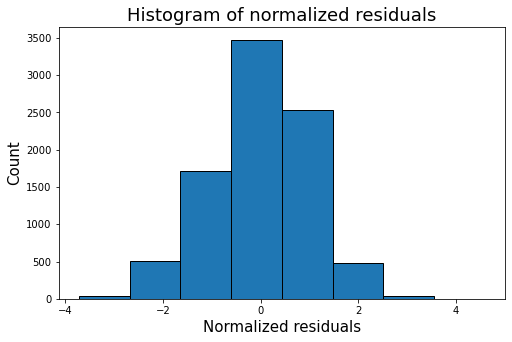

In [81]:
#histogram of normalized residuals
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

the normalized residuals are approximately normal

*__QQ plots of the residuals__*

In [83]:
from statsmodels.graphics.gofplots import qqplot

C:\Users\Jenipher\OneDrive\Documents\anacon\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x360 with 0 Axes>

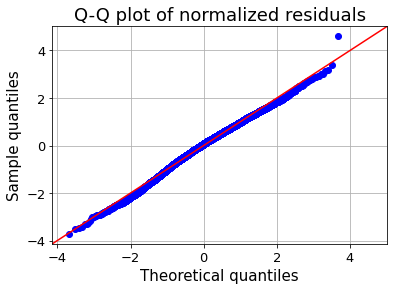

In [84]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

Judging only from the two checks above, the residuals do appear to be normally distributed.

__(ii) using sklearn__

In [85]:
df5 =df_new_features.copy(deep=True)
X = df5.drop(['load_shortfall_3h'], axis=1)
y = df5['load_shortfall_3h']

In [90]:
lms = LinearRegression()

In [91]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [92]:
lms.fit(X_train, y_train)

LinearRegression()

In [93]:
#predictive accuracy
y_pred = lm.predict(X_test)
print("RMSE: ",round(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE:  4757


| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4713|
 
 
 From the table above we can see that the linear regression with all the features has better predictive accuracy
 

In [94]:
preds=lms.predict(X_standardise_test)

In [95]:
daf=pd.DataFrame(preds,columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,7210.459126
1,9864.293976
2,9279.173068
3,10517.524531
4,15558.740700


In [96]:
output=pd.DataFrame({'time':df_test1['time']})
submission=output.join(daf)
#submission.to_csv('submission.csv',index=False)

submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,7210.459126
1,2018-01-01 03:00:00,9864.293976
2,2018-01-01 06:00:00,9279.173068
3,2018-01-01 09:00:00,10517.524531
4,2018-01-01 12:00:00,15558.740700
...,...,...
2915,2018-12-31 09:00:00,636.991932
2916,2018-12-31 12:00:00,8347.758007
2917,2018-12-31 15:00:00,11212.720016
2918,2018-12-31 18:00:00,12018.442278


In [97]:
import pickle

model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

### 5.3 Fitting a  regularized linear regression model

Regularisation offers an alternative method to the variable selection selection performed above. With regularisation the intention to scale each feature by how much it affects. There is a penality on those individual coefficients that get too large (those that contribute the most to reducing the fit).


We will now offer an alternative model. Where there is no descrete variable selection as above but a model that is achieved through ridge regression

#### Ridge Regression

In [96]:
df_ridge=df2.copy(deep=True)

In [97]:
df_ridge.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Barcelona_pressure,Madrid_rain_1h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,load_shortfall_3h
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024277,-0.247776,0.342424,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.675368,-1.602429,-1.226179,-1.090901,0.0,0.0,-0.00274,-1.709703,6715.666667
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.024206,-0.247776,0.342424,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.675368,-1.602429,-1.226179,-0.654451,0.0,0.0,-0.00274,-1.709703,4171.666667
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,1.588087,-0.224278,-0.024158,-0.247776,0.342424,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-1.675368,-1.602429,-1.226179,-0.218001,0.0,0.0,-0.00274,-1.709703,4274.666667
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,1.588087,-0.224278,-0.024229,-0.247776,0.342424,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-1.675368,-1.602429,-1.226179,0.218449,0.0,0.0,-0.00274,-1.709703,5075.666667
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,1.588087,-0.224278,-0.024372,-0.247776,0.342424,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,-1.675368,-1.602429,-1.226179,0.654899,0.0,0.0,-0.00274,-1.709703,6620.666667


In [98]:
X = df_ridge.drop(['load_shortfall_3h'], axis=1)
y = df_ridge['load_shortfall_3h']

In [99]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [100]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [101]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [102]:
# Create ridge model
ridge = Ridge(alpha=10)

In [103]:
# Train the model
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [104]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [105]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [106]:
print("Intercept:", float(b0))

Intercept: 10415.978633421639


In [107]:
# Check out the coefficients
coeff

,Coefficient
Madrid_wind_speed,-406.780597
Valencia_wind_deg,-167.512563
Bilbao_rain_1h,-201.815851
Valencia_wind_speed,-87.802070
Seville_humidity,-743.838500
Madrid_humidity,-260.798572
Bilbao_clouds_all,-115.849994
Bilbao_wind_speed,-59.469793
Seville_clouds_all,112.317674
Bilbao_wind_deg,-363.175644


__*Predictive accuracy of the  model*__ 

In [108]:
# Import metrics module
from sklearn import metrics

In [109]:
train_ridge = ridge.predict(X_train)

In [110]:
print('Ridge Train MSE:', round(metrics.mean_squared_error(y_train, train_ridge)))

Ridge Train MSE: 22159035


In [111]:
test_ridge = ridge.predict(X_test)

In [112]:
print('Ridge train MS :', round(metrics.mean_squared_error(y_test, test_ridge)))

Ridge train MS : 22441881


In [113]:
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test,test_ridge))))

RMSE:  4737


| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 
 The model with the best prdictive accuracy is still the linear regression with all the features.
 

### 5.4. Building a Random Forest Regression Model

In [114]:
df6 =df2.copy(deep=True)

In [115]:
X = df6.drop(['load_shortfall_3h'], axis=1)
y = df6['load_shortfall_3h']
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=6)

In [116]:
#fitting decision tree
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=10)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=10)

In [117]:
#testing
from sklearn.metrics import mean_squared_error
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE: 3054


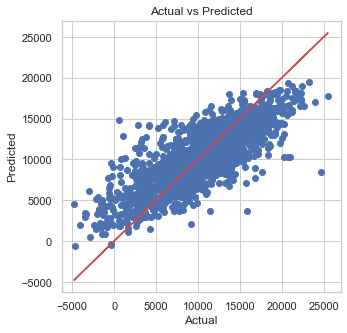

In [118]:
#fit actual vs expected
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()


__Tuning model hyperparameters__

Hyperparameter tuning is the process of determining the right combination of hyperparameters that allows the model to maximize model performance. Setting the correct combination of hyperparameters is the only way to extract the maximum performance out of models.
The RandomForestRegressor with n_estimators=100 and max_depth=10 is going to be hypertuned since it has the lowest RMSE .


Tuning the number of n_estimators

In [119]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=10, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=23)

In [120]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=2, random_state=23)

In [121]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=23)

In [122]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=23)

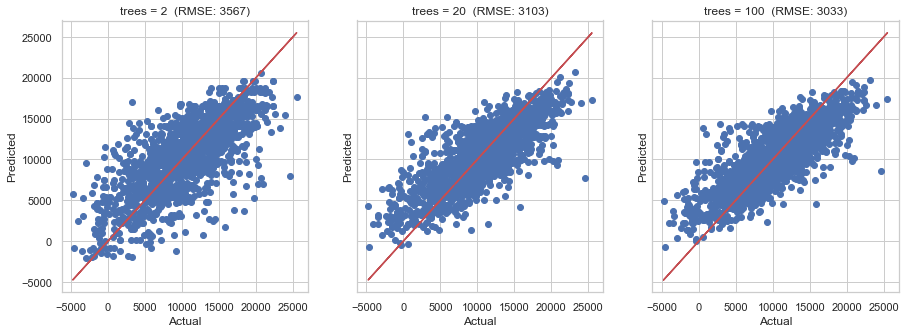

In [123]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

Tuning the max_depth

In [124]:
forest_4 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)
forest_5 = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=23)


In [125]:
forest_4.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

In [126]:
forest_5.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, random_state=23)

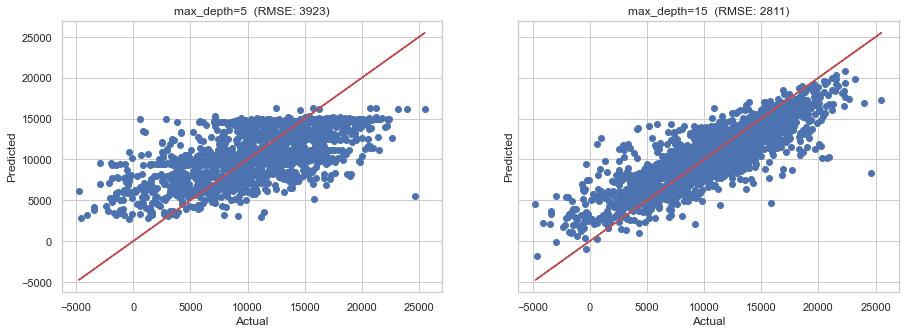

In [127]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_4.predict(x_test), forest_5.predict(x_test)]
title = ['max_depth=5','max_depth=15']

# Loop through all axes to plot each model's results 
for i in range(2):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

Due to hyperparameteres tuning it is clear that the forest with 100 trees,max_depth=15 and random_state=23 performs the best. This is the best performing model this far.

| Model | RSME |
|:--- |:--- |
 |1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 2811|
 
 The random forest model has the best predictive accuracy.

In [128]:
#Predict on test dataframe
y_pred_test_RF = forest_5.predict(X_standardise_test)

In [129]:
daf2=pd.DataFrame(y_pred_test_RF,columns=['load_shortfall_3h'])
daf2

,load_shortfall_3h
0,8180.221944
1,2448.518319
2,2044.812319
3,3365.909242
4,5153.919747
...,...
2915,14109.180513
2916,14860.930995
2917,14297.817151
2918,14996.399258


In [130]:
output2=pd.DataFrame({'time':df_test1['time']})
submission_RF=output2.join(daf2)
submission_RF.to_csv('submission_RF.csv',index=False)

submission_RF

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8180.221944
1,2018-01-01 03:00:00,2448.518319
2,2018-01-01 06:00:00,2044.812319
3,2018-01-01 09:00:00,3365.909242
4,2018-01-01 12:00:00,5153.919747
...,...,...
2915,2018-12-31 09:00:00,14109.180513
2916,2018-12-31 12:00:00,14860.930995
2917,2018-12-31 15:00:00,14297.817151
2918,2018-12-31 18:00:00,14996.399258


### 5.5. Fitting a decision tree model

In [131]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=10)
DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [132]:
# Get predictions
y_pred = DT.predict(x_test)
# Compute RMSE
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred))))


RMSE: 3635


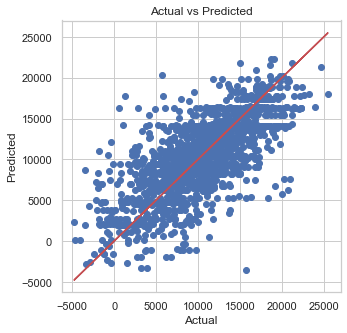

In [133]:
# Gfit actual vs expected
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()


| Model | RSME |
|:--- |:--- |
|1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 2811|
 |5. Decision tree | 3616|
 
 The random forest model is has the best predictive accuracy.

In [134]:
#Predict test responde variable
y_pred3 = DT.predict(X_standardise_test)

daf3=pd.DataFrame(y_pred3,columns=['load_shortfall_3h'])


output3=pd.DataFrame({'time':df_test1['time']})
submission_DT=output3.join(daf3)
#submission_DT.to_csv('submission_DT.csv',index=False)

submission_DT

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9761.000000
1,2018-01-01 03:00:00,-441.833333
2,2018-01-01 06:00:00,-441.833333
3,2018-01-01 09:00:00,-1208.208333
4,2018-01-01 12:00:00,-1208.208333
...,...,...
2915,2018-12-31 09:00:00,13775.373333
2916,2018-12-31 12:00:00,16398.232456
2917,2018-12-31 15:00:00,16398.232456
2918,2018-12-31 18:00:00,16398.232456


### 5.6. Support Vector Regressor

In [135]:
from sklearn.svm import SVR

In [136]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma=0.1, C=0.001)

In [137]:
sv_reg.fit(x_train,y_train)

SVR(C=0.001, gamma=0.1)

In [138]:
y_pred = sv_reg.predict(x_test)
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE:  5128


| Model | RSME |
|:--- |:--- |
|1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 2811|
 |5. Decision tree | 3613|
 |6. Support Vector Regressor | 5128|
 
 The random forest model has the best predictive accuracy.

### 5.7.  Heterogeneous Ensembles  

In [139]:
# Instantiate a voting ensemble usinG sklearn's VotingRegressor class
from sklearn.ensemble import VotingRegressor

In [140]:
# Define the models which we'll include in our ensemble. 
# We pass a list of tuples, which each have a string identifier for the
# model (arbitrary choice), along the actual instantiated sklearn model.  
models = [("rf",forest_3),("DT",DT),("lin model",lm)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.5,0.4,0.1])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

At this point, this voting-based ensemble combines:

50% of Random Forest output,
40% of Decision Tree output and
10% of linear regression output

In [141]:
#making the final prediction
v_reg.fit(x_train,y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=10,
                                                   random_state=23)),
                            ('DT', DecisionTreeRegressor(max_depth=10)),
                            ('lin model', LinearRegression())],
                weights=array([0.5, 0.4, 0.1]))

In [142]:
#Let's check the performance of the voting ensemble.
y_pred = v_reg.predict(x_test)
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test,y_pred))))


RMSE:  3125


| Model | RSME |
|:--- |:--- |
|1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 2811|
 |5. Decision tree | 3613|
 |6. Support Vector Regressor | 5128|
 |7. Heterogeneous Ensembles | 3106|
 
 The random forest model has the best predictive accuracy.

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Of the fitted 7 models to the data provided.Performance have been evaluated using the Root Mean Square Error (RMSE). This is a measure of how the avarage error for each model. Below is a table that summarizes each model.



| Model | RSME |
|:--- |:--- |
|1. Linear Least Squares Regression | 4665|
 |2. Linear Least Squares Regression on dataset with no correlated features | 4715|
 |3. Ridge regression | 4737|
 |4. Random Forest | 2811|
 |5. Decision tree | 3613|
 |6. Support Vector Regressor | 5128|
 |7. Heterogeneous Ensembles | 3106|


The model that has the best performance accuracy is the Random Forest model. On average the error for predicting the correct three hourly shortfalls is 2811.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



This is a discussion how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings.



To understand random forests, a  person must understand decisions trees.




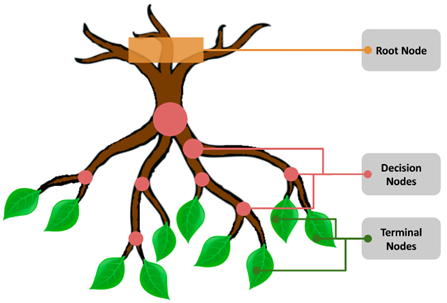





- Decision trees are constructed using two kinds of elements: nodes and branches as can be seen in the image. 
- At each node data is partitioned  into two different sections based on questions asked of one input variable (independent variable) in the data.
- This is done in order to make a prediction or to further ask questions about that input variable

For example:

- Is the minimum temperature in Barcelona greater than or equal to 25 if yes than 3 hour load shortfall is 3000.
- If it is not, another question will be asked like, is it greater than 30 if yes than 3 hour load shortfall is 2000.
- This is done until we reach a terminal node.


- A random forest combines many decision trees into a single model. 
- The problem with decision trees is that this model learns the data too closely and as a result, the model is useful in reference only to its initial data set and not to any other data sets.
- The predictions made by decision trees may not be accurate but combined together, the predictions will be closer to the mark on average.


In our random forest model we used 100 trees with 10 nodes. On average we were the actual prediction by 2811.

API

In [143]:
#import pickle

#model_save_path = "assets/trained-models/RF_model.pkl"
#with open(model_save_path,'wb') as file:
#    pickle.dump(RF,file)

## Conclusion

Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them.

Dealing with a large dataset has afforded us the opportuninty to gather insights that could be used to better understand
the trends and patterns of the country's renewable sources and fossil fuel's energy generation which allowed us to dig deeper on how these different sources are correlated,with the aid of variety EDA techniques.

Different algorithms and  predictive modelling techniques which investigates the relationship between the dependent variable (daily shortfall)  and independent variables were employed with the aim of  modelling the shortfall between the energy generated by means of fossil fuels and various renewable sources  and finding the casual effect relationship between the variables.

After carefully training and cross-validating a number of algorithms using features available.It was observed that the random forest algorithm which  bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree did a better job in predicting the future shortfalls based on the low RMSE it gave.

## References 

https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

https://www.analyticsvidhya.com/blog/2020/05/datetime-variables-python-pandas/

https://machinelearningmastery.com/feature-selection-for-regression-data/

    